# Phase 1


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2
import numpy as npب
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [3]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import cv2
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import os

In [4]:
def load_dataset():
  image_pickle_file_path = '/content/drive/MyDrive/Phase1/images.pkl'
  label_pickle_file_path = '/content/drive/MyDrive/Phase1/label.pkl'

  with open(image_pickle_file_path, 'rb') as file:
    images = pickle.load(file)

  with open(label_pickle_file_path, 'rb') as file:
    labels = pickle.load(file)


  return images, labels

In [5]:
# Classify the datapoints with the Random Forest Classifier

def classify(datapoints, labels):
  test_size = 0.2
  X_train, X_test, y_train, y_test = train_test_split(datapoints, labels, test_size=test_size, random_state=42)

  clf = RandomForestClassifier(n_estimators=100, random_state=42)

  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy * 100:.2f}%")



In [6]:
images, labels = load_dataset()

In [7]:
len(labels)

560

test hsv...

In [8]:
rand_image = images[55]
rand_hsv_image = cv2.cvtColor(rand_image, cv2.COLOR_BGR2HSV)

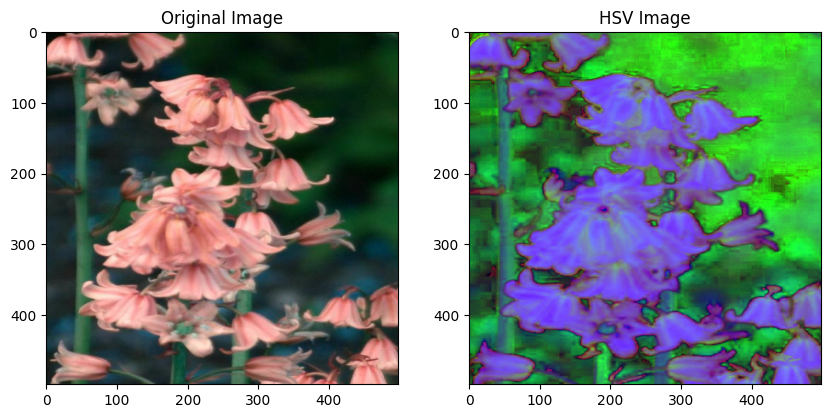

In [9]:
#display image and its conversion to hsv
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(rand_image)
axes[0].set_title('Original Image')

# Display the second image
axes[1].imshow(rand_hsv_image)
axes[1].set_title('HSV Image')

plt.show()


# phase 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

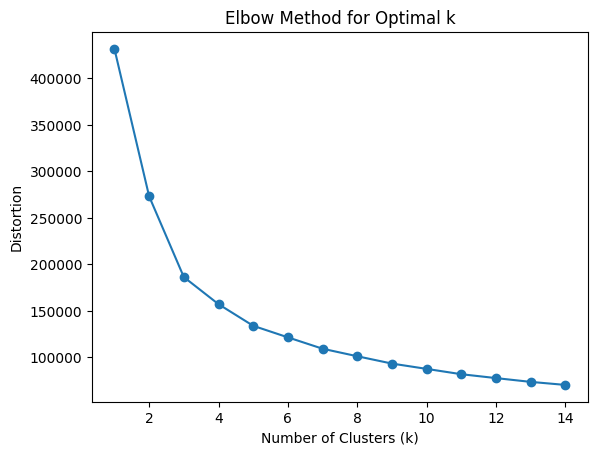

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


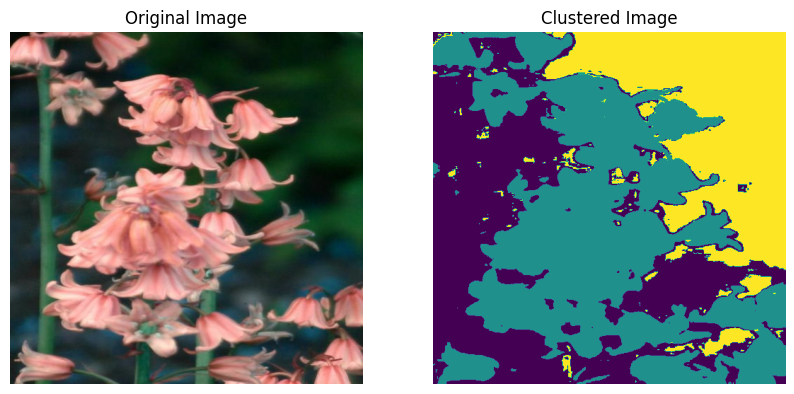

Silhouette Score: 0.3803065158862736
Calinski Harabasz Score: 163826.97858503935


In [80]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

# Load and preprocess the image
selected_image = rand_image
hsv_image = cv2.cvtColor(selected_image, cv2.COLOR_BGR2HSV)
resized_image = cv2.resize(hsv_image, (499, 499))

# Extract color features
color_features = resized_image.reshape(-1, 3).astype(float)
max_values = np.max(color_features, axis=0)
color_features /= max_values

# Extract spatial features
x, y = np.meshgrid(np.linspace(0, 1, resized_image.shape[1]), np.linspace(0, 1, resized_image.shape[0]))
spatial_features = np.column_stack((x.ravel(), y.ravel()))

# Combine color and spatial features
combined_features = np.concatenate((color_features, spatial_features), axis=1)

# Feature scaling
scaler = RobustScaler()
combined_features_scaled = np.concatenate((color_features, scaler.fit_transform(spatial_features)), axis=1)
combined_features_scaled = scaler.fit_transform(combined_features_scaled)

# Elbow Method for choosing the number of clusters
distortions = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

# Perform k-means clustering
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(combined_features_scaled)
segmented_labels = kmeans.labels_

# Reshape segmented_labels to match image dimensions
clustered_image = np.reshape(segmented_labels, (resized_image.shape[0], resized_image.shape[1]))

# Visualize the clustered image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(selected_image)
axs[0].axis('off')
axs[0].set_title('Original Image')
axs[1].imshow(clustered_image)
axs[1].axis('off')
axs[1].set_title('Clustered Image')
plt.show()

# Calculate evaluation metrics
silhouette_avg = silhouette_score(combined_features_scaled, segmented_labels)
calinski_harabasz_score_value = calinski_harabasz_score(combined_features_scaled, segmented_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score_value}")

# phase 2

In [64]:
import numpy as np

def extract_features(hsv_image):
    mean_hue = np.mean(hsv_image[:, :, 0])
    mean_saturation = np.mean(hsv_image[:, :, 1])
    mean_value = np.mean(hsv_image[:, :, 2])

    mean_horizontal_position = np.mean(np.where(hsv_image[:, :, 2] > 0)[0])
    mean_vertical_position = np.mean(np.where(hsv_image[:, :, 2] > 0)[1])

    image_center = np.array([hsv_image.shape[0] / 2, hsv_image.shape[1] / 2])
    mean_position = np.array([mean_horizontal_position, mean_vertical_position])

    distance_from_center = np.linalg.norm(image_center - mean_position)

    features = {
        'mean_hue': mean_hue,
        'mean_saturation': mean_saturation,
        'mean_value': mean_value,
        'mean_horizontal_position': mean_horizontal_position,
        'mean_vertical_position': mean_vertical_position,
        'distance_from_center': distance_from_center
    }

    return features

In [69]:
len(labels)

560

In [70]:
def load_data(images):
    data = []

    for image in images:
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        features = extract_features(hsv_image)
        data.append(features)

    return np.array(data), labels

In [71]:
len(labels)

560

In [72]:
data, labels = load_data(images)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=4)

X_train_array = np.array([list(features.values()) for features in X_train])
X_test_array = np.array([list(features.values()) for features in X_test])

X_train_clusters = kmeans.fit_predict(X_train_array)
X_test_clusters = kmeans.predict(X_test_array)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
X_train_clusters

array([1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1,
       0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0,

In [74]:
X_test_clusters

array([1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2,
       1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1,
       0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2,
       1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1,
       1, 0], dtype=int32)

In [75]:
X_train_hist = np.histogram(X_train_clusters, bins=3, range=(0, 3), density=True)[0].reshape(1, -1)
X_test_hist = np.histogram(X_test_clusters, bins=3, range=(0, 3), density=True)[0].reshape(1, -1)


In [58]:
X_train_hist

array([[0.40401786, 0.34598214, 0.25      ]])

In [59]:
X_test_hist

array([[0.4375    , 0.28571429, 0.27678571]])

In [60]:
y_train

[6,
 5,
 0,
 0,
 3,
 0,
 4,
 4,
 4,
 3,
 1,
 2,
 1,
 4,
 0,
 3,
 3,
 6,
 3,
 3,
 2,
 4,
 0,
 5,
 0,
 1,
 2,
 6,
 2,
 6,
 5,
 5,
 2,
 4,
 2,
 6,
 2,
 5,
 0,
 6,
 6,
 2,
 4,
 1,
 1,
 5,
 5,
 3,
 5,
 3,
 4,
 4,
 6,
 5,
 1,
 1,
 5,
 3,
 6,
 0,
 4,
 0,
 3,
 6,
 4,
 3,
 3,
 6,
 5,
 0,
 6,
 3,
 3,
 0,
 4,
 2,
 3,
 6,
 4,
 1,
 1,
 3,
 4,
 2,
 0,
 1,
 2,
 2,
 6,
 3,
 0,
 3,
 0,
 0,
 6,
 0,
 6,
 3,
 6,
 6,
 5,
 5,
 1,
 2,
 2,
 1,
 0,
 5,
 3,
 6,
 0,
 1,
 0,
 2,
 4,
 4,
 4,
 0,
 0,
 6,
 5,
 0,
 4,
 5,
 0,
 2,
 4,
 6,
 1,
 4,
 6,
 0,
 6,
 2,
 3,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 6,
 2,
 6,
 6,
 2,
 5,
 0,
 3,
 2,
 4,
 5,
 2,
 1,
 3,
 3,
 5,
 3,
 1,
 4,
 0,
 4,
 6,
 1,
 4,
 4,
 5,
 6,
 4,
 3,
 5,
 5,
 5,
 0,
 1,
 3,
 4,
 0,
 1,
 4,
 3,
 3,
 5,
 3,
 1,
 3,
 6,
 0,
 4,
 2,
 6,
 1,
 6,
 1,
 4,
 4,
 1,
 5,
 1,
 1,
 2,
 5,
 1,
 5,
 3,
 5,
 1,
 2,
 2,
 4,
 3,
 4,
 4,
 6,
 4,
 5,
 5,
 1,
 6,
 2,
 6,
 2,
 1,
 6,
 4,
 4,
 5,
 6,
 5,
 4,
 3,
 5,
 5,
 4,
 1,
 2,
 5,
 5,
 5,
 3,
 1,
 5,
 2,
 3,
 4,
 2,
 3,


In [61]:
X_train_array

array([[ 42.37122742, 202.11175859, 125.19461769, 249.        ,
        249.        ,   0.70710678],
       [ 28.73909342, 116.57631094, 165.73288461, 249.        ,
        249.        ,   0.70710678],
       [ 90.11248148,  81.94000426, 156.44048417, 249.        ,
        249.        ,   0.70710678],
       ...,
       [ 38.036787  , 163.26554512, 124.00292368, 249.0245607 ,
        249.02271312,   0.67368041],
       [ 25.90232971, 200.16638889, 146.22830029, 249.00549409,
        248.99453001,   0.70713224],
       [ 29.32509106, 181.96486761, 109.01968265, 248.62275536,
        248.13177428,   1.6252999 ]])

Accuracy: 0.4017857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.32      0.36        19
           1       0.65      0.52      0.58        21
           2       0.42      0.31      0.36        16
           3       0.45      0.77      0.57        13
           4       0.25      0.19      0.21        16
           5       0.20      0.44      0.28         9
           6       0.40      0.33      0.36        18

    accuracy                           0.40       112
   macro avg       0.40      0.41      0.39       112
weighted avg       0.42      0.40      0.40       112

Confusion Matrix:
 [[ 6  0  1  1  6  2  3]
 [ 0 11  1  4  1  3  1]
 [ 0  1  5  4  0  6  0]
 [ 1  0  0 10  1  0  1]
 [ 5  1  2  2  3  2  1]
 [ 0  1  1  0  0  4  3]
 [ 2  3  2  1  1  3  6]]


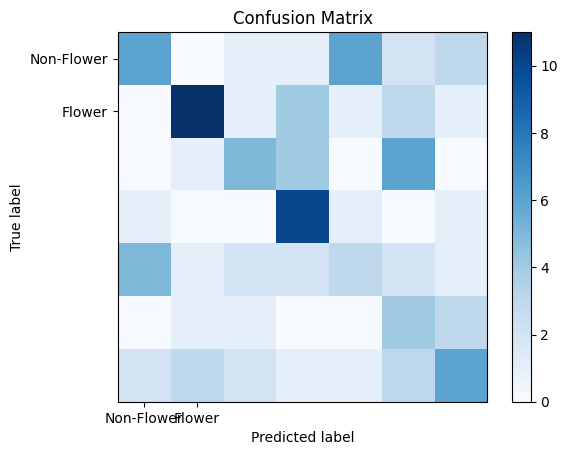

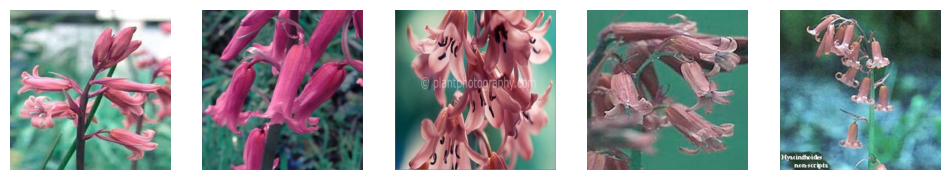

In [76]:
# import cv2
# import numpy as np
# from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ###
# import matplotlib.pyplot as plt



clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_array, y_train)

y_pred = clf.predict(X_test_array)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Non-Flower", "Flower"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

misclassified_indices = np.where(y_test != y_pred)[0]
plt.figure(figsize=(12, 6))

for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[index])
    plt.axis('off')

plt.show()

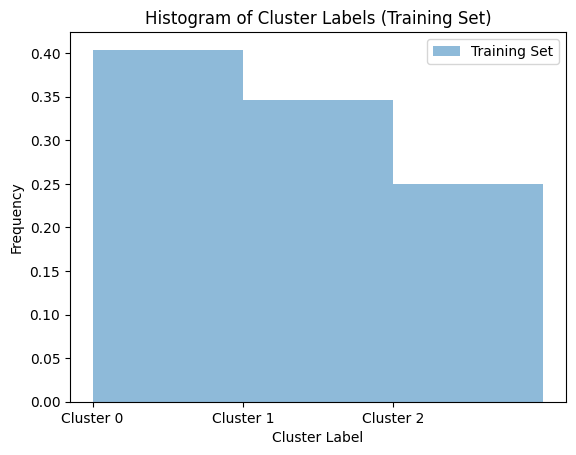

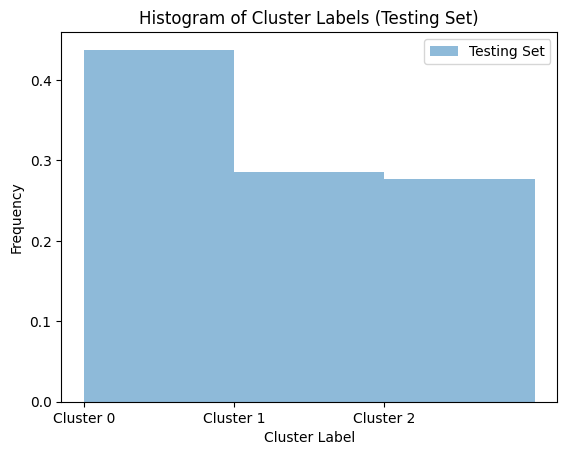

In [63]:
# Calculate histograms for cluster labels in the training set
train_hist, train_bins, _ = plt.hist(X_train_clusters, bins=range(len(set(X_train_clusters)) + 1), density=True, alpha=0.5, label='Training Set')
plt.title('Histogram of Cluster Labels (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(train_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_train_clusters)))])
plt.legend()
plt.show()

# Calculate histograms for cluster labels in the testing set
test_hist, test_bins, _ = plt.hist(X_test_clusters, bins=range(len(set(X_test_clusters)) + 1), density=True, alpha=0.5, label='Testing Set')
plt.title('Histogram of Cluster Labels (Testing Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(test_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_test_clusters)))])
plt.legend()
plt.show()


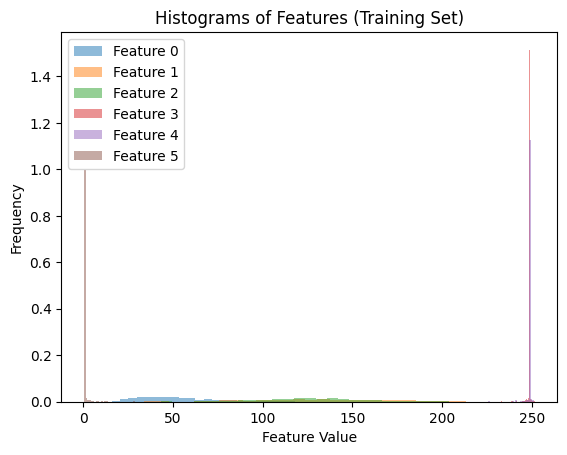

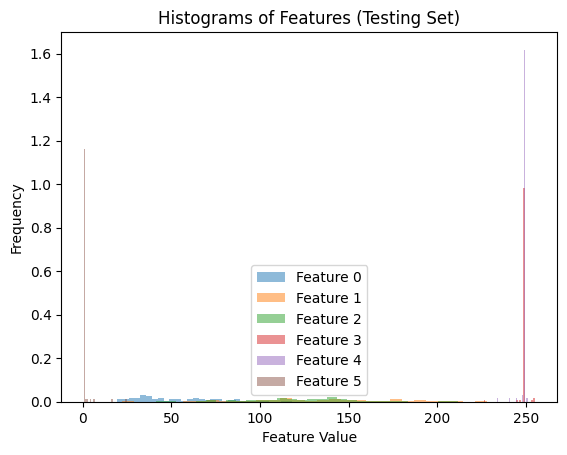

In [64]:

# Assuming X_train_final and X_test_final contain the features and histograms for each sample

# Calculate histograms for features in the training set
for feature_index in range(X_train_array.shape[1]):
    plt.hist(X_train_array[:, feature_index], bins=30, density=True, alpha=0.5, label=f'Feature {feature_index}')

plt.title('Histograms of Features (Training Set)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate histograms for features in the testing set
for feature_index in range(X_test_array.shape[1]):
    plt.hist(X_test_array[:, feature_index], bins=30, density=True, alpha=0.5, label=f'Feature {feature_index}')

plt.title('Histograms of Features (Testing Set)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# main Phase 2

Number of feature vectors before clustering: 448


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of feature vectors after clustering: 448


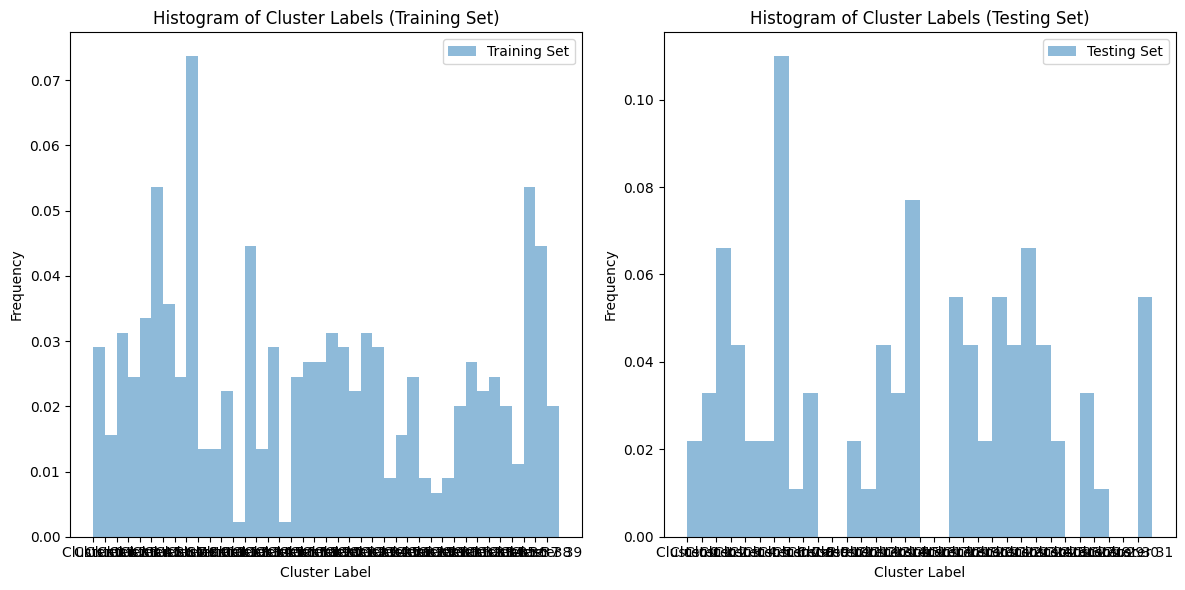

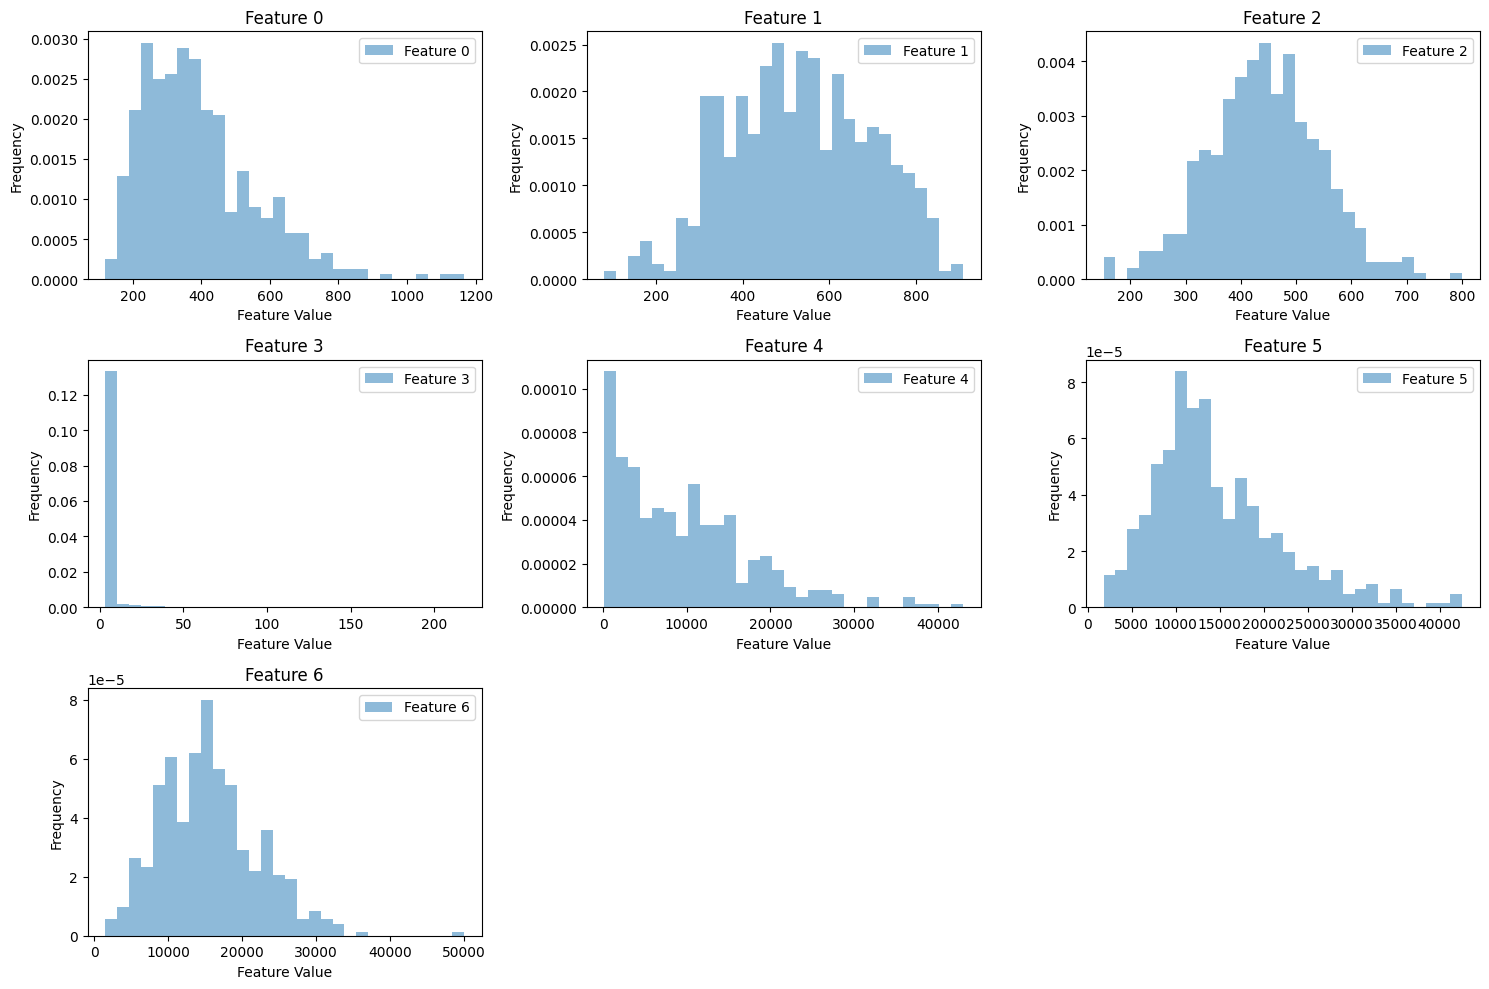

Accuracy: 0.5178571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.67      0.57      0.62        21
           2       0.60      0.56      0.58        16
           3       0.55      0.85      0.67        13
           4       0.40      0.38      0.39        16
           5       0.55      0.67      0.60         9
           6       0.38      0.28      0.32        18

    accuracy                           0.52       112
   macro avg       0.51      0.54      0.52       112
weighted avg       0.51      0.52      0.51       112



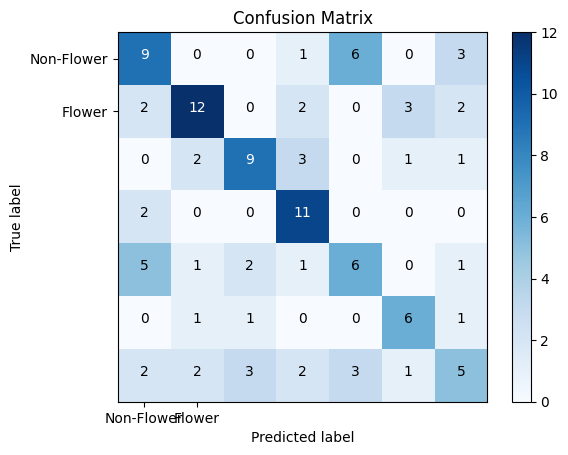

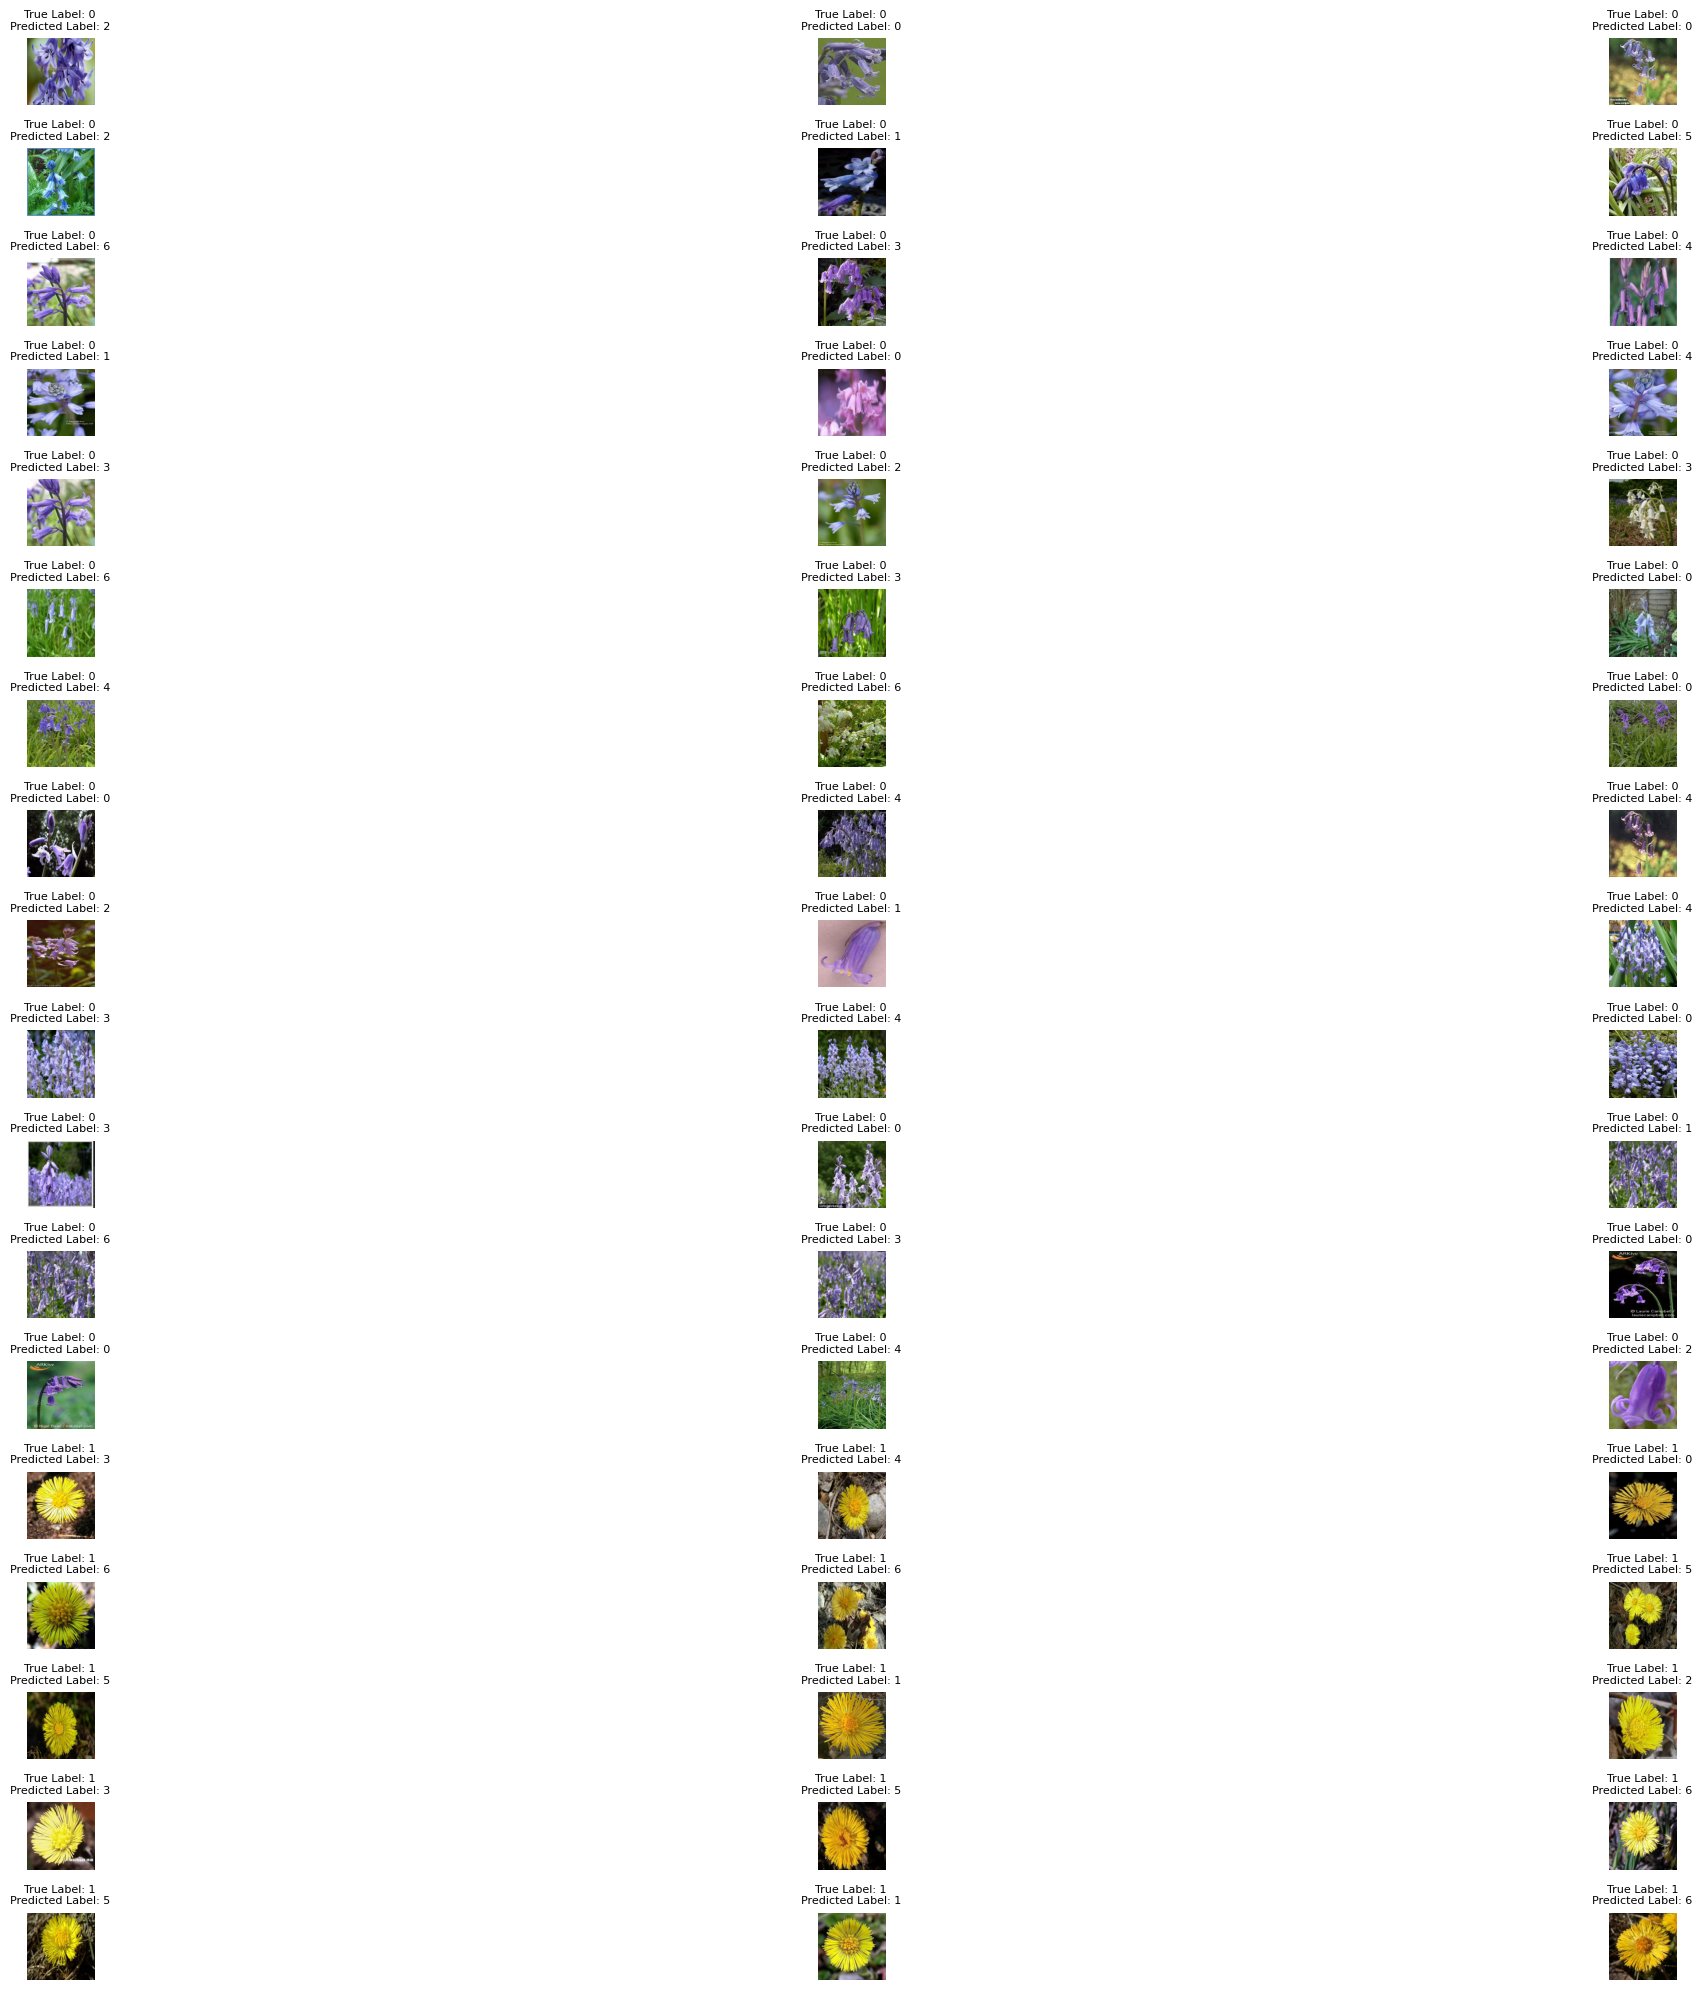

In [14]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from skimage.filters import gabor



def extract_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # features
    mean_hue = np.mean(hsv_image[:, :, 0])
    mean_saturation = np.mean(hsv_image[:, :, 1])
    mean_value = np.mean(hsv_image[:, :, 2])
    distance_from_center = calculate_distance_from_center(hsv_image)

    # Calculate variances of saturation and value
    saturation_channel = hsv_image[:, :, 1]
    value_channel = hsv_image[:, :, 2]
    saturation_variance = np.var(saturation_channel)
    value_variance = np.var(value_channel)

    # Calculate hue variance
    hue_channel = hsv_image[:, :, 0]
    hue_variance = np.var(hue_channel)

    # Assign weights to the features
    weights = [5, 4, 3.5, 7.5, 6]
    weighted_features = [
        mean_hue * weights[3],
        mean_saturation * weights[1],
        mean_value * weights[2],
        distance_from_center * weights[3],
        hue_variance * weights[3],
        saturation_variance * weights[2],
        value_variance * weights[2]
    ]

    features = {
        'mean_hue': weighted_features[0],
        'mean_saturation': weighted_features[1],
        'mean_value': weighted_features[2],
        'distance_from_center': weighted_features[3],
        'hue_variance': weighted_features[4],
        'saturation_variance': weighted_features[5],
        'value_variance': weighted_features[6]
    }

    return features

def calculate_distance_from_center(image):
    height, width, _ = image.shape
    image_center = np.array([height / 2, width / 2])
    nonzero_pixels = np.transpose(np.nonzero(image[:, :, 2]))
    mean_position = np.mean(nonzero_pixels, axis=0)
    distance_from_center = np.linalg.norm(image_center - mean_position)
    return distance_from_center

def load_data(images, labels):
    data = []

    for image in images:
        features = extract_features(image)
        data.append(features)

    return np.array(data), labels

# Load and split the data
data, labels = load_data(images, labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# K-means Clustering
kmeans = KMeans(n_clusters=40)

X_train_array = np.array([list(features.values()) for features in X_train])
X_test_array = np.array([list(features.values()) for features in X_test])

# Print the number of feature vectors before clustering
print(f"Number of feature vectors before clustering: {X_train_array.shape[0]}")

X_train_clusters = kmeans.fit_predict(X_train_array)
X_test_clusters = kmeans.predict(X_test_array)

# Print the number of feature vectors after clustering
print(f"Number of feature vectors after clustering: {X_train_clusters.shape[0]}")

# Calculate histograms for cluster labels in the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_hist, train_bins, _ = plt.hist(X_train_clusters, bins=range(len(set(X_train_clusters)) + 1),
                                     density=True, alpha=0.5, label='Training Set')
plt.title('Histogram of Cluster Labels (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(train_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_train_clusters)))])
plt.legend()

# Calculate histograms for cluster labels in the testing set
plt.subplot(1, 2, 2)
test_hist, test_bins, _ = plt.hist(X_test_clusters, bins=range(len(set(X_test_clusters)) + 1),
                                   density=True, alpha=0.5, label='Testing Set')
plt.title('Histogram of Cluster Labels (Testing Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(test_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_test_clusters)))])
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Assuming X_train_final and X_test_final contain the features and histograms for each sample

# Calculate histograms for features in the training set
num_features = X_train_array.shape[1]
num_columns = 3  # Change this to adjust the number of columns
num_rows = int(np.ceil(num_features / num_columns))
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 10))

for feature_index in range(num_features):
    row = feature_index // num_columns
    col = feature_index % num_columns
    axs[row, col].hist(X_train_array[:, feature_index], bins=30, density=True, alpha=0.5, label=f'Feature {feature_index}')
    axs[row, col].set_title(f'Feature {feature_index}')
    axs[row, col].set_xlabel('Feature Value')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend()

# Remove empty subplots if the number of features is not a multiple of the number of columns
if num_features % num_columns != 0:
    for i in range(num_features % num_columns, num_columns):
        fig.delaxes(axs[num_rows-1, i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Random Forest Classification
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_array, y_train)

y_pred = clf.predict(X_test_array)
#y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Non-Flower", "Flower"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Display Misclassified Images
misclassified_indices = np.where(y_test != y_pred)[0]

# Exclude cases where the true and predicted labels are the same
misclassified_indices = [index for index in misclassified_indices if y_test[index] != y_pred[index]]

num_columns = 3  # Change this to adjust the number of columns
num_rows = int(np.ceil(len(misclassified_indices) / num_columns))
fig, axs = plt.subplots(num_rows, num_columns, figsize=(30, 20))

for index, misclassified_index in enumerate(misclassified_indices):
    row = index // num_columns
    col = index % num_columns
    misclassified_image = images[misclassified_index]
    true_label = labels[misclassified_index]
    predicted_label = y_pred[misclassified_index]

    axs[row, col].imshow(cv2.cvtColor(misclassified_image, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f"True Label: {true_label}\nPredicted Label: {predicted_label}", fontsize=8)
    axs[row, col].axis("off")

# Remove empty subplots if the number of misclassified images is not a multiple of the number of columns
if len(misclassified_indices) % num_columns != 0:
    for i in range(len(misclassified_indices) % num_columns, num_columns):
        fig.delaxes(axs[num_rows-1, i])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [37]:
images , labels = load_dataset()

In [38]:
len(labels)

560

In [39]:
len(images)

560

In [65]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def extract_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # features
    mean_hue = np.mean(hsv_image[:, :, 0])
    mean_saturation = np.mean(hsv_image[:, :, 1])
    mean_value = np.mean(hsv_image[:, :, 2])
    distance_from_center = calculate_distance_from_center(hsv_image)

    # Calculate variances of saturation and value
    saturation_channel = hsv_image[:, :, 1]
    value_channel = hsv_image[:, :, 2]
    saturation_variance = np.var(saturation_channel)
    value_variance = np.var(value_channel)

    # Calculate hue variance
    hue_channel = hsv_image[:, :, 0]
    hue_variance = np.var(hue_channel)

    # Assign weights to the features
    weights = [5, 4, 3.5, 7.5, 6]
    weighted_features = [
        mean_hue * weights[0],
        mean_saturation * weights[1],
        mean_value * weights[2],
        distance_from_center * weights[3],
        hue_variance * weights[3],
        saturation_variance * weights[4],
        value_variance * weights[2]
    ]

    features = {
        'mean_hue': weighted_features[0],
        'mean_saturation': weighted_features[1],
        'mean_value': weighted_features[2],
        'distance_from_center': weighted_features[3],
        'hue_variance': weighted_features[4],
        'saturation_variance': weighted_features[5],
        'value_variance': weighted_features[6]
    }

    return features

def calculate_distance_from_center(image):
    height, width, _ = image.shape
    image_center = np.array([height / 2, width / 2])
    nonzero_pixels = np.transpose(np.nonzero(image[:, :, 2]))
    mean_position = np.mean(nonzero_pixels, axis=0)
    distance_from_center = np.linalg.norm(image_center - mean_position)
    return distance_from_center

def load_data(images, labels):
    data = []

    for image in images:
        features = extract_features(image)
        data.append(features)

    return np.array(data), labels

# Load your images and labels here
images = [...]  # List of images
labels = [...]  # List of corresponding labels

# Load and split the data
data, labels = load_data(images, labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# K-means Clustering
kmeans = KMeans(n_clusters=2)

X_train_array = np.array([list(features.values()) for features in X_train])
X_test_array = np.array([list(features.values()) for features in X_test])

# Print the number of feature vectors before clustering
print(f"Number of feature vectors before clustering: {X_train_array.shape[0]}")

X_train_clusters = kmeans.fit_predict(X_train_array)
X_test_clusters = kmeans.predict(X_test_array)

# Print the number of feature vectors after clustering
print(f"Number of feature vectors after clustering: {X_train_clusters.shape[0]}")

# Calculate histograms for cluster labels in the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_hist, train_bins, _ = plt.hist(X_train_clusters, bins=range(len(set(X_train_clusters)) + 1),
                                     density=True, alpha=0.5, label='Training Set')
plt.title('Histogram of Cluster Labels (Training Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(train_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_train_clusters)))])
plt.legend()

# Calculate histograms for cluster labels in the testing set
plt.subplot(1, 2, 2)
test_hist, test_bins, _ = plt.hist(X_test_clusters, bins=range(len(set(X_test_clusters)) + 1),
                                   density=True, alpha=0.5, label='Testing Set')
plt.title('Histogram of Cluster Labels (Testing Set)')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.xticks(test_bins[:-1], [f'Cluster {label}' for label in range(len(set(X_test_clusters)))])
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display thehistogram plots
plt.show()

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model
rf_classifier.fit(X_train_clusters.reshape(-1, 1), y_train)

# Make predictions
y_pred_train = rf_classifier.predict(X_train_clusters.reshape(-1, 1))
y_pred_test = rf_classifier.predict(X_test_clusters.reshape(-1, 1))

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_pred_test))


error: ignored